#**Data preprocessing**

# **Importing essential tools**

In [59]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [73]:
url = 'https://raw.githubusercontent.com/SeffySnow/styleSmart/main/dataset/images.csv'
images = pd.read_csv(url)

# 1.Undersanding Data

In [74]:
df = pd.DataFrame(images)
df.head(150)

,image,sender_id,label,kids
0,4285fab0-751a-4b74-8e9b-43af05deee22,124,Not sure,False
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,148,T-Shirt,False
2,00627a3f-0477-401c-95eb-92642cbe078d,94,Not sure,False
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,43,T-Shirt,False
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,189,Shoes,False
...,...,...,...,...
145,223939a1-c2a0-41c7-8956-fb1b6370ebeb,305,Pants,False
146,3c5ff556-36e1-442e-8ae7-1b836067916d,320,Undershirt,False
147,708af227-43ba-4e2b-b35b-652a13cd1c77,33,Hat,False
148,f937d0b8-1c6f-432f-86a8-dac89c03b890,10,Polo,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   image      5403 non-null   object
 1   sender_id  5403 non-null   int64 
 2   label      5175 non-null   object
 3   kids       5403 non-null   bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 132.0+ KB


 ## 1-1.Missing Value

Image (Object),


sender Id = (Numerical),


label = (categorical),


kids = (Boolean)






### Counting the missing value in each columns

In [25]:
# prompt: columns with value " Not sure" change to "Nan

import numpy as np
df = df.applymap(lambda x: np.nan if x == 'Not sure' else x)
df.isna().sum()


image          0
sender_id      0
label        228
kids           0
dtype: int64

### Creating Image dataset with no missing value

In [75]:
images_without_na = df.dropna(inplace=False)
images_without_na.isna().sum()

image        0
sender_id    0
label        0
kids         0
dtype: int64

In [12]:
print(f'The length of dataset with no NAs : {len(images_without_na)}\n The length of dataset with  NAs : {len(df)}\n The difference is : {len(df)-len(images_without_na)}' )

The length of dataset with no NAs : 5175
 The length of dataset with  NAs : 5403
 The difference is : 228


In [19]:
images_without_na.shape

(5175, 4)

## 1-2.Categorical feature (Label) analysis

In [38]:
import matplotlib.pyplot as plt

images_without_na["label"].value_counts()




T-Shirt       1011
Longsleeve     699
Pants          692
Shoes          431
Shirt          378
Dress          357
Outwear        312
Shorts         308
Hat            171
Skirt          155
Polo           120
Undershirt     118
Blazer         109
Hoodie         100
Body            69
Other           67
Top             43
Blouse          23
Skip            12
Name: label, dtype: int64

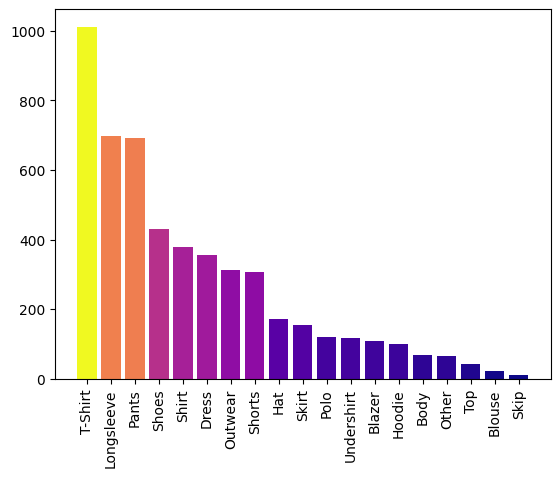

In [60]:

fig,ax = plt.subplots()
my_cmap = plt.get_cmap("plasma")
y =  images_without_na["label"].value_counts()

ax.bar(x= images_without_na["label"].value_counts().index, height= images_without_na["label"].value_counts().values, color=my_cmap(rescale(y)))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

In [53]:
df.columns

Index(['image', 'sender_id', 'label', 'kids'], dtype='object')

In [62]:
df['kids'].value_counts()

False    4927
True      476
Name: kids, dtype: int64

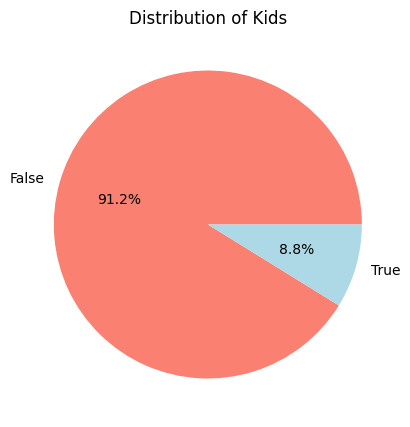

In [64]:


# Get the data
kids_counts = df['kids'].value_counts()



# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(kids_counts, labels=kids_counts.index, autopct='%1.1f%%', colors=["salmon", "lightblue"])
plt.title('Distribution of Kids')
plt.show()

In [88]:
images_without_na["label"].unique()

['Not sure', 'T-Shirt', 'Shoes', 'Shorts', 'Shirt', ..., 'Polo', 'Blouse', 'Hoodie', 'Skip', 'Blazer']
Length: 20
Categories (20, object): ['Blazer', 'Blouse', 'Body', 'Dress', ..., 'Skirt', 'T-Shirt', 'Top',
                          'Undershirt']

**the sample size is not sufficient**
latest challeng : reduce number of features